# Homework 4
## Due Date:  Thursday, October 24th at 11:59 PM

[Problem 0](#p0).  Homework Workflow [10 pts]

[Problem 1](#p1).  Motivating Automatic Differentiation [20 pts]

[Problem 2](#p2).  A Neural Network, Forward Mode [25 pts]

[Problem 3](#p3).  Visualizing Reverse Mode [10 pts]

[Problem 4](#p4).  A Toy AD Implementation [20 pts]

[Problem 5](#p5).  Continuous Integration and Coverage [15 pts]



## IMPORTANT
Don't forget to work on Milestone 1: [Milestone 1 Page](https://harvard-iacs.github.io/2020-CS107/project/M1/).

<a id='p0'></a>
## Problem 0: Homework Workflow [10 points]
Once you receive HW3 feedback (no later than Friday Oct. 18th), you will need to merge your `HW3-dev` branch into `master`. 

You will earn points for following all stages of the git workflow which involves:
* 3pts for merging `HW3-dev` into `master`
* 5pts for completing HW4 on `HW4-dev`
* 2pts for making a PR on `HW4-dev` to merge into `master`

<a id='p1'></a>
## Problem 1: Motivating Automatic Differentiation [20 pts]

For scalar functions of a single variable, the derivative is defined by
$$ f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}$$

We can approximate the derivative of a function using finite, but small  values of `h`.  All code for this problem should be contained in `P1.py`.

### Part A: Write a Numerical Differentiation Closure
Write a closure called `numerical_diff` which takes as inputs a function (of a single variable) `f` and a value of `h` and returns a function which takes as input a value of `x` that computes the numerical approximation of the derivative of `f` with stepsize `h` at `x`.

### Part B: Compare the Closure to the True Derivative
Let $f(x) = \ln(x)$.  For $.2 \leq x \leq .4$, make a plot comparing the numerically estimated derivative for `h=1e-1`, `h=1e-7`, and `h=1e-15` to the analytic derivative.  Save your plot as `P1_fig.png`.

Notes:
- You should use the analytic derivative explicitly.
- Your plot should be readable and interpretable (i.e., you should include axis labels and a legend).  You may need to change the line style for all lines to be visible.

### Part C: Why Automatic Differentiation?
Answer the following questions using two `print` statements to display your answers. These can be placed at the very end of `P1.py` (but before `plt.show()`).  Each print statement should start with the string: `"Answer to Q-i:"` where `i` is either `a` or `b` to reference the questions below.
- Q-a: Which value of `h` most closely approximates the true derivative?  What happens for values of h that are too small?  What happens for values of h that are too large?
- Q-b: How does automatic differentiation address these problems?


#### Deliverables
- `P1.py`
- `P1_fig.png`

### SOLUTION

Text(0, 0.5, 'df/dx')

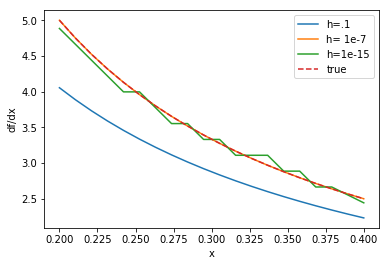

In [6]:
#PART A (7 pts total)

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def numerical_diff(f, h): #2 points for correct inputs
    def num_der(x):
        return (f(x+h)-f(x))/h #2 points for correct implementation
    return num_der #3 points for writing as a closure


# PART B (8 pts total)

#2 pts for using closure to define new functions
nd = numerical_diff(np.log, 1E-1)
nd2 = numerical_diff(np.log, 1E-7)
nd3 = numerical_diff(np.log, 1E-15)

x = np.linspace(.2, .4, 20) #1pt for correct x range


plt.plot(x, nd(x), label = 'h=.1')
plt.plot(x, nd2(x), label = 'h= 1e-7')
plt.plot(x, nd3(x), label = 'h=1e-15')
plt.plot(x, 1/x, '--', label = 'true') #1pt for correct analytic derivative expression
plt.legend()
plt.xlabel('x')
plt.ylabel('df/dx')

#2 pts for plotting 4 lines
#1 pt for legend and axis labels
#1 pt for making both derivative lines visible for the "true" derivative (likely using a dashed line)

#### Part C (5 pts total)

Q-a:
- h=1e-7 performs best (1pt)
- For h too small, we encounter roundoff errors (as a result of limited machine precision). (1 pt)
- For h too large, the numerical approximation is not exact. (1 pt)

Q-b:
- Automatic differentiation evaluates derivatives exactly to machine precision without taking numerical estimates.  (2pts)

<a id='p2'></a>
## Problem 2: A Neural Network, Forward Mode [25 points]

Artificial neural networks take as input the values of an input layer of neurons and combine these inputs in a series of layers to compute an output.  A small network with a single hidden layer is drawn below.

![NN](../fig/NNFigNoPhi.png)

This network can be expressed in matrix notation as $$f\left(x,y\right) = w_{\text{out}}^{T}z\left(W\begin{bmatrix}x \\ y \end{bmatrix} + \begin{bmatrix}b_{1} \\ b_{2}\end{bmatrix}\right) + b_{\text{out}}$$ where $$W = \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22}\end{bmatrix}$$ is a (real) matrix of weights, $$w_{\text{out}} = \begin{bmatrix} w_{\text{out},1} \\ w_{\text{out},2} \end{bmatrix}$$ is a vector representing output weights, $b_i$ are bias terms, and $z$ is a nonlinear function that acts component-wise.

The above graph helps us visualize the computation in different layers.  This visualization hides many of the underlying operations which occur in the computation of $f$ (e.g. it does not explicitly express the elementary operations).  

#### Your Tasks
In this part, you will completely neglect the biases.  The mathematical form is therefore $$f\left(x,y\right) = w_{\text{out}}^{T}z\left(W\begin{bmatrix}x \\ y \end{bmatrix}\right).$$  Note that in practical applications the biases play a key role.  However, we have elected to neglect them in this problem so that your results are more readable.  You will complete the two steps below while neglecting the bias terms.

1. As we have done in lecture, draw the complete forward graph.  You may treat $z$ as a single elementary operation. Submit a picture of the graph as `P2_graph.png`.  This picture can be a picture taken of your graph drawn on a piece of paper or it can be something that you draw electronically.
2. Use your graph to write out the full forward mode table and submit a picture of the table as `P2_table.png`.  This table can, once again, be done on a piece of paper or in markdown.

#### Submission Notes:
- For the graph, you should explicitly show the multiplications and additions that are masked in the schematic of the network above.
- You should relabel the nodes of the graph with traces (e.g. $x_{13}$) as we have done in class.
- Your table should include columns for the trace, elementary function, current function value, elementary function derivative, partial x derivative, and partial y derivative.  Here is an example table with a row filled in (**Note:** Your table will not contain this exact row.  Your table will have something else for $x_{4}$.)

| Trace | Elementary Function | Current Value | Elementary Function Derivative | $\nabla_{x}$ Value  | $\nabla_{y}$ Value  | 
| :---: | :-----------------: | :-----------: | :----------------------------: | :-----------------: | :-----------------: | 
| $x_{4}$ | $1/x_{1}$ | 1 | $-\dot{x}_{1}/x_{1}^{2}$ | $-1$ | $0$ |

- The values in your table should be in terms of $w_{1, out}, w_{2, out}, w_{11}, w_{12}, w_{21}, w_{22}, z,$ and $z^{\prime}$, where $\prime$ denotes a derivative.
- Pictures of handwritten graphs and tables are fine but make sure that these are legible.

#### Deliverables
- `P2_graph.png`
- `P2_table.png`

### SOLUTION

#### Graph (12 pt)
![NNSol](../fig/HW4P2SolnGraph.png)

#### Table (13 pts (1 pt per row, should correspond to graph))
| Trace | Elementary Function | Current Value | Elementary Function Derivative | $\nabla_{x}$ Evaluated at $(x,y)$  | $\nabla_{y}$ Evaluated at $(x,y)$ |
| :---: | :-----------------: | :-----------------------------------: | :----------------------------: | :----------------------: | :-----------------: |
|$x_1$ | $x$ | $x$ | $1$ | $1$ | $0$ |
|$x_2$ | $y$ | $y$ | $1$ | $0$ | $1$ |
|$x_3$ | $w_{11}\times x_1$ | $w_{11} x$ | $w_{11} \dot{x_1}$ | $w_{11}$ | $0$ |
|$x_4$ | $w_{21}\times x_1$ | $w_{21} x$ | $w_{21} \dot{x_1}$ | $w_{21}$ | $0$ |
|$x_5$ | $w_{12}\times x_2$ | $w_{12} y$ | $w_{12} \dot{x_2}$ | $0$ | $w_{12}$ |
|$x_6$ | $w_{22}\times x_2$ | $w_{22} y$ | $w_{22} \dot{x_2}$ | $0$ | $w_{22}$ |
|$x_7$ | $x_3 + x_5$ | $w_{11}x + w_{12} y$ | $\dot{x_3}+\dot{x_5}$ | $w_{11}$ | $w_{12}$ |
|$x_8$ | $x_4 + x_6$ | $w_{21}x + w_{22} y$ | $\dot{x_4}+\dot{x_6}$ | $w_{21}$ | $w_{22}$ |
|$x_9$ | $z(x_7)$ | $z(w_{11}x + w_{12} y)$ | $z^\prime(x_7) \dot{x_7}$ | $z^\prime(w_{11}x + w_{12} y)w_{11}$ | $z^\prime(w_{11}x + w_{12} y)w_{12}$ |
|$x_{10}$ | $z(x_8)$ | $z(w_{21}x + w_{22} y)$ | $z^\prime(x_8) \dot{x_8}$ | $z^\prime(w_{21}x + w_{22} y)w_{21}$ | $z^\prime(w_{21}x + w_{22} y)w_{22}$ |
|$x_{11}$ | $w_{out, 1}\times x_9$ | $w_{out, 1} z(w_{11}x + w_{12} y)$ | $w_{out, 1} \dot{x_9}$ | $w_{out, 1} z^\prime(w_{11}x + w_{12} y)w_{11}$ | $w_{out, 1} z^\prime(w_{11}x + w_{12} y)w_{12}$ |
|$x_{12}$ | $w_{out, 2}\times x_{10}$ | $w_{out, 2} z(w_{21}x + w_{22} y)$ | $w_{out, 2} \dot{x_{10}}$ | $w_{out, 2} z^\prime(w_{21}x + w_{22} y)w_{21}$ | $w_{out, 2} z^\prime(w_{21}x + w_{22} y)w_{22}$ |
|$x_{13} $ | $x_{11} + x_{12} $ | $w_{out, 1} z(w_{11}x + w_{12} y)+w_{out, 2} z(w_{21}x + w_{22} y)$ | $\dot{x_{11}} + \dot{x_{12}}$| $w_{out, 1} z^\prime(w_{11}x + w_{12} y)w_{11} + w_{out, 2} z^\prime(w_{21}x + w_{22} y)w_{21}$|$w_{out, 1} z^\prime(w_{11}x + w_{12} y)w_{12} + w_{out, 2} z^\prime(w_{21}x + w_{22} y)w_{22}$ |

<a id='p3'></a>
## Problem 3: Visualizing Reverse Mode [10 points]
This problem provides you with a tool to help visualize automatic differentiation.  This automatic differentiation code base and GUI originated as the fall 2018 CS207 final project extension for Lindsey Brown, Xinyue Wang, and Kevin Yoon, and it has been further developed over the past year.  It is meant to be a resource for you as you learn automatic differentiation.


### Part A: Preview of Virtual Environments
In lecture, we will be learning about how to use virtual environments to create workspaces to use only certain packages.  For this problem, we will walk through how to set up a virtual environment using `conda` to create a workspace to contain a GUI to help with the visualization of the automatic differentiation functions.

1. Set up a virtual environment.  Use the command `conda create -n env_name python=3.6 anaconda` where `env_name` is a name of your choosing for your virtual environment.
2. Activate your virtual environment, using `source activate env_name`.
   - Note:  Some systems might given an error here and ask you to execute a different sequence of commands.  If this happens, please follow the commands suggested in your terminal.
3. Install the visualization tools for automatic differentiation, `pip install ADvis`.
4. Get the homework files using `git clone https://github.com/CS207-AD20/CS207-2019-HW4`.
5. Change into the new directory, `cd CS207-2019-HW4`.
6. Install the dependencies using `pip install -r requirements.txt`.


### Part B: Visualize Backward Mode for the Neural Network
For this part, we will use the simplified neural network model (no bias terms) from Problem 2 again.  For this part only (Problem 3B), take $w_{out} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$, $W = \begin{bmatrix} 1.1 & 1.2 \\ 2.1 & 2.2 \end{bmatrix}$, and $z$ to be the identity.

To do so you'll be inputing $f(x,y)$ into either the command line (option A) or the GUI (option B), so you will need $f(x,y)$ in scalar form. (Hint:  This should be the last line of your evaluation table.) **Do not simplify by multiplying the weights togther.  Each of the 6 constants should appear in the function expression exactly once.**  This will look strange, but it is the way that you should do the problem.

Visualize the reverse mode either by running the `HW4-ADvis.py` file and running the script or by using the GUI interface.

#### Option A: Run `HW4vis.py`
1.  Run the file using `python HW4vis.py`.
2.  Follow the input instructions in the file.  You are free to choose any $x$ and $y$ value at which to evaluate the function and its derivatives.
3.  Save the reverse mode graph as `P3_graph.png`.
4.  Deactivate your virtual environment using `conda deactivate`.

#### Option B: Use the GUI
**Note:  It is a known issue that Tkinter (the package used for the GUI development) and macOS Mojave have some compatibility issues.  If you are running Mojave, please use Option A.**  In the worst case, Macs running Mojave will restart without any warning when running Tkinter-based GUIs.  Other behaviors have been observed as well.

1.  Launch the GUI using `python ADGUI.py`.
2.  Input $f(x,y)$ into the GUI.  Maximize the calculator window to be able to see all the options.
3.  Hit "Calculate" and choose an $x$ and $y$ value at which to evaluate the function and its derivatives.  Again maximize the graph window to see all the options.
4.  Use the GUI options to visualize the forward and reverse graphs.  Save the reverse mode graph as `P3_graph.png`.  (Hint: The graph structure will be easier to see if you maximize the graph window.)
5.  Deactivate your virtual environment using `conda deactivate`.

#### Deliverables
- `P3_graph.png`

### SOLUTION
- 5pts submitted some graph output
- 1 pt arrows in correct direction (from outputs to inputs)
- 2 pt two input nodes, one output node, 6 constant nodes
- 2 pt correct graph

![SolGraph](../fig/HW4P2Reverse.png)

<a id='p4'></a>
## Problem 4:  A Toy AD Implementation [20 points]

You will write a toy forward automatic differentiation class.  Write a class called `AutoDiffToy` that can return the derivative of functions of the form $$f = \alpha x + \beta$$ for constants $\alpha, \beta \in \mathbb{R}$.

#### Interface
* Must contain a constructor that sets the value of the function and derivative
  - This would be like the first row in the evaluation trace tables that we've been making.
* Must overload functions where appropriate.
* Handle exceptions appropriately.
  - This is a good place to use (and practice) duck-typing.  For example, rather than checking if an argument to a special method is an instance of the object, instead use a `try-except` block, catch an `AttributeError` and do the appropriate calculation.
  - **Hint:** [Asking Forgiveness](https://softwareengineering.stackexchange.com/questions/175655/python-forgiveness-vs-permission-and-duck-typing)

#### Use Case
```python
a = 2.0 # Value to evaluate at
x = AutoDiffToy(a)

alpha = 2.0
beta = 3.0
f = alpha * x + beta
```

#### Output
```python
print(f.val, f.der)
7.0 2.0
```

#### Requirements
* Implementation must be robust enough to handle functions written in the form
```python
f = alpha * x + beta
f = x * alpha + beta
f = beta + alpha * x
f = beta + x * alpha
```
* You should demo your code with an example for each of these 4 cases.

#### Deliverables
- `P4.py` containing your class and demo

### SOLUTION

In [2]:
class AutoDiffToy():
    """Creates an object for autodifferentiation
    
    ATTRIBUTES
    ==========
    val : the value of the object
    der : the derivative of the object
    
    EXAMPLES
    ========
    >>> x = AutoDiffToy(4)
    >>> x.val
    4
    >>> x.der
    1
    """
    #Constructor sets value and derivative
    def __init__(self, a, d = 1.0): 
        self.val = a
        self.der = d
    
    #Overloads add
    def __add__(self, other): #overload addition
        try: #ask forgiveness
            return AutoDiffToy(self.val+other.val, self.der+other.der)
        except AttributeError:
            other = AutoDiffToy(other, 0) #derivative of a constant is zero
            return AutoDiffToy(self.val+other.val, self.der+other.der)
    
    #Overloads radd
    def __radd__(self, other): #ensure commutativity of addition
        return self.__add__(other)
    
    #Overloads mul
    def __mul__(self, other): #overload multiplication
        try:
            return AutoDiffToy(self.val*other.val, self.val*other.der+other.val*self.der)
        except AttributeError:
            other = AutoDiffToy(other, 0)
            return AutoDiffToy(self.val*other.val, self.val*other.der+other.val*self.der)
    
    #Overloads rmul
    def __rmul__(self, other):
        return self.__mul__(other)
    
alpha  = 2
beta = 3

x = AutoDiffToy(2)

f1 = alpha*x+beta
f2 = x*alpha +beta
f3 = beta+alpha*x
f4 = beta+x*alpha

print('f1:')
print(f1.val, f1.der)

print('f2:')
print(f2.val, f2.der)

print('f3:')
print(f3.val, f3.der)

print('f4:')
print(f4.val, f4.der)

f1:
7 2.0
f2:
7 2.0
f3:
7 2.0
f4:
7 2.0


<a id='p5'></a>
## Problem 5: Continuous Integration [15 pts]

**Note:** You will not be able to start this problem until after lecture 13.

We discussed documentation and testing in lecture (or will very soon) and also briefly touched on code coverage.  You must write tests for your code in your final project (and in life).  There is a nice way to automate the testing process called continuous integration (CI). This problem will walk you through the basics of CI and show you how to get up and running with some CI software.

The idea behind continuous integration is to automate aspects of the testing process. 

The basic workflow goes something like this:

1. You work on your part of the code in your own branch or fork.
2. On every commit you make and push to GitHub, your code is automatically tested by an external service (e.g. Travis CI). This ensures that there are no specific dependencies on the structure of your machine that your code needs to run and also ensures that your changes are sane.
3. When you want to merge your changes with the master / production branch you submit a pull request to `master` in the main repo (the one you're hoping to contribute to). The repo manager creates a branch off `master`. 
4. This branch is also set to run tests on Travis. If all tests pass, then the pull request is accepted and your code becomes part of master.

In this problem, we will use GitHub to integrate our roots library with Travis CI and CodeCov. (Note that this is not the only workflow people use.)

### Part A:
Create a **public** GitHub repo called `cs207test` and clone it to your local machine.  (**Note:** This should be done **outside** your course repo.)

### Part B:

Use the example from lecture 13 to create a file called `roots.py`, which contains the `quad_roots` and `linear_roots` functions (along with their documentation). Now, also create a file called `test_roots.py`, which contains the tests from lecture.

All of these files should be in your newly created `cs207test` repo.  **Don't push yet!!!**

### Part C: Create an account on Travis CI and Start Building

Create an account on [Travis CI](https://travis-ci.org/) and set your `cs207test` repo up for continuous integration once this repo can be seen on Travis.

### Part D:
Create an instruction to Travis to make sure that

1. python 3.6 is installed
2. pytest is installed

The file should be called `.travis.yml` and should have the contents (**Note:** The `yml` line *should not* be present in your file.  This is a rendering issue with the html.  Everything below `yml` should be in your file.  Please download and open the Jupyter notebook to see the correct format with synatx highlighting.):
```yml
language: python
python:
    - "3.6"
before_install:
    - pip install pytest pytest-cov
script:
    - pytest
```

### Part E:
Push the new changes to your `cs207test` repo.

At this point you should be able to see your build on Travis and if and how your tests pass.

### Part F:  CodeCov Integration
In class, we also discussed code coverage.  Just like Travis CI runs tests automatically for you, CodeCov automatically checks your code coverage.

Create an account on [`CodeCov`](https://codecov.io/), connect your GitHub, and turn CodeCov integration on.

### Part G:
Update your the `.travis.yml` file as follows (**Note:** The `yml` line *should not* be present in your file.  This is a rendering issue with the html.  Everything below `yml` should be in your file.  Please download and open the Jupyter notebook to see the correct format with synatx highlighting.):
```yml
language: python
python:
    - "3.6"
before_install:
    - pip install pytest pytest-cov
    - pip install codecov
script:
    - pytest --cov=./
after_success:
    - codecov
```

Be sure to push the latest changes to your new repo.

### Part H:
You can have your GitHub repo reflect the build status on Travis CI and the code coverage status from CodeCov.  To do this, you should modify the `README.md` file in your repo to include some badges.  Put the following at the top of your `README.md` file:

```
[![Build Status](https://travis-ci.org/dsondak/cs207testing.svg?branch=master)](https://travis-ci.org/dsondak/cs207testing.svg?branch=master)

[![Coverage Status](https://codecov.io/gh/dsondak/cs207testing/branch/master/graph/badge.svg)](https://codecov.io/gh/dsondak/cs207testing)
```

Of course, you need to make sure that the links are to your repo and not mine.  You can find embed code on the CodeCov and Travis CI sites.

#### Deliverables
- `P5.md` which contains a link to your public `cs207test` repo.  The course staff will grade the `README` in that repository. 

### SOLUTION
- P5.md with correct repo link, roots.py and test_roots.py in repo (5pts)
- Travis badge (5pts)
- CodeCov badge (5pts)